In [178]:
import numpy as np
import tidy3d as td
from tidy3d.plugins import DispersionFitter

import matplotlib.pyplot as plt

In [179]:
cauchy_coeffs=[1.543, 71.4, 0.]
wl = np.arange(500.,2500.)

N0, N1, N2 = cauchy_coeffs
n = N0 + N1 / wl**2 + N2 / wl**4

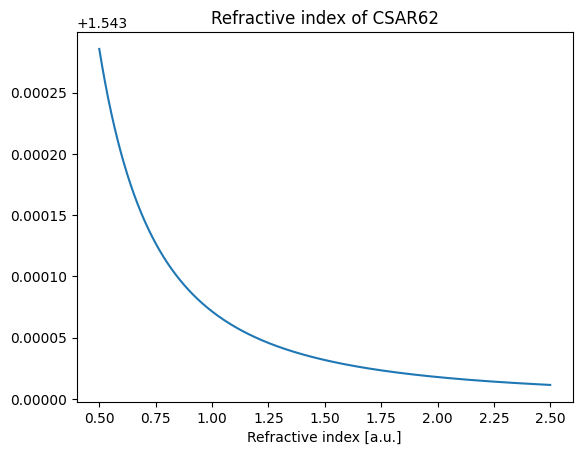

In [180]:
fig, ax = plt.subplots(1)
ax.plot(wl * 1e-3, n)
ax.set_title('Refractive index of CSAR62')
ax.set_xlabel('Wavelength [um]')
ax.set_xlabel('Refractive index [a.u.]')
plt.show()

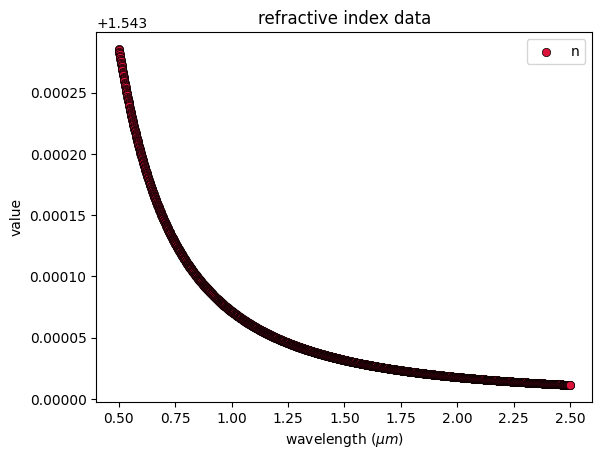

In [181]:
fitter = DispersionFitter(wvl_um=wl*1e-3, n_data=n, wvl_range=[0.5, 2.5])

# lets plot the data
plt.scatter(
    fitter.wvl_um,
    fitter.n_data,
    label="n",
    color="crimson",
    edgecolors="black",
    linewidth=0.5,
)
# plt.scatter(
#     fitter.wvl_um,
#     fitter.k_data,
#     label="k",
#     color="blueviolet",
#     edgecolors="black",
#     linewidth=0.5,
# )
plt.xlabel("wavelength ($\mu m$)")
plt.ylabel("value")
plt.title("refractive index data")
plt.legend()
plt.show()


In [194]:
medium, rms_error = fitter.fit(num_poles=2, tolerance_rms=2e-5, num_tries=500)

[09:38:19] INFO             found optimal fit with RMS error = 1.00e-06, returning                       ]8;id=860771;file:///Users/lucasgrosjean/.pyenv/versions/3.11.2/envs/pepper/lib/python3.11/site-packages/tidy3d/plugins/dispersion/fit.py\fit.py]8;;\:]8;id=126960;file:///Users/lucasgrosjean/.pyenv/versions/3.11.2/envs/pepper/lib/python3.11/site-packages/tidy3d/plugins/dispersion/fit.py#361\361]8;;\

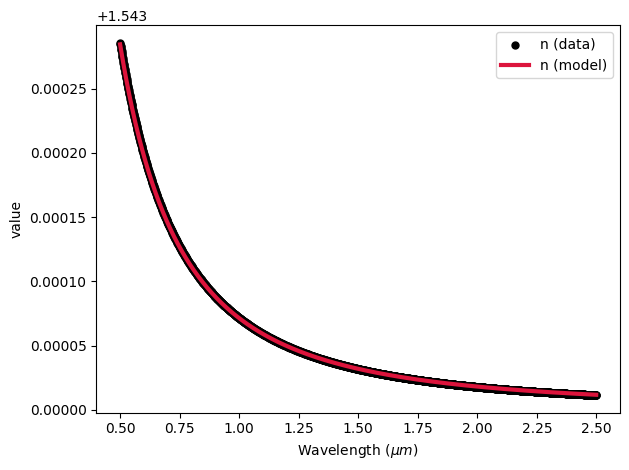

In [195]:
fitter.plot(medium)
plt.show()

In [196]:
print(medium)
# td.PoleResidue(
# 	eps_inf=1.0, 
# 	poles=((1.3727107194260728e+17j, -6.093034981754017e+16j), (-1.83658298289027e+17j, 4.528208825831985e+16j)), 
# 	frequency_range=(119964969187675.06, 599584916000000.0))
# -> Best fit actually

td.PoleResidue(
	eps_inf=1.0, 
	poles=((1.3727107194260728e+17j, -6.093034981754017e+16j), (-1.83658298289027e+17j, 4.528208825831985e+16j)), 
	frequency_range=(119964969187675.06, 599584916000000.0))
